# Задача 2. Шадрин Сергей

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import kstest, uniform, norm, gamma
from tqdm import tqdm_notebook
from pprint import pprint

In [18]:
N_EXP = 100
SAMPLE_SIZES = np.arange(4, 300 + 1, 10)
np.random.seed(123)
ALPHA = 0.05

lpowers = []
kpowers = []
lpowers2 = []
kpowers2 = []
lfprs = []
kfprs = []

for sample_size in tqdm_notebook(SAMPLE_SIZES):

    samples = uniform(-1, 1).rvs(size=sample_size * N_EXP).reshape((N_EXP, -1))
    samples_means = np.mean(samples, axis=1)
    samples_vars = np.var(samples, axis=1)
    lpvs = [lilliefors(samples[i, :], dist='norm', pvalmethod='table')[1] for i in range(N_EXP)]
    kpvs = [kstest(samples[i, :], norm(loc=samples_means[i], scale=samples_vars[i] ** 0.5).cdf)[1] for i in range(N_EXP)]

    samples2 = gamma(0.2).rvs(size=sample_size * N_EXP).reshape((N_EXP, -1))
    samples_means2 = np.mean(samples2, axis=1)
    samples_vars2 = np.var(samples2, axis=1)
    lpvs2 = [lilliefors(samples2[i, :], dist='norm', pvalmethod='table')[1] for i in range(N_EXP)]
    kpvs2 = [kstest(samples2[i, :], norm(loc=samples_means2[i], scale=samples_vars2[i] ** 0.5).cdf)[1] for i in range(N_EXP)]

    samples_norm = norm().rvs(size=sample_size * N_EXP).reshape((N_EXP, -1))
    samples_means3 = np.mean(samples_norm, axis=1)
    samples_vars3 = np.var(samples_norm, axis=1)
    lpvs_norm = [lilliefors(samples_norm[i, :], dist='norm', pvalmethod='table')[1] for i in range(N_EXP)]
    kpvs_norm = [kstest(samples_norm[i, :], norm(loc=samples_means3[i], scale=samples_vars3[i] ** 0.5).cdf)[1] for i in range(N_EXP)]

    lpowers.append(sum([p <= ALPHA for p in lpvs]) / N_EXP)
    kpowers.append(sum([p <= ALPHA for p in kpvs]) / N_EXP)
    lpowers2.append(sum([p <= ALPHA for p in lpvs2]) / N_EXP)
    kpowers2.append(sum([p <= ALPHA for p in kpvs2]) / N_EXP)
    lfprs.append(sum([p <= ALPHA for p in lpvs_norm]) / N_EXP)
    kfprs.append(sum([p <= ALPHA for p in kpvs_norm]) / N_EXP)


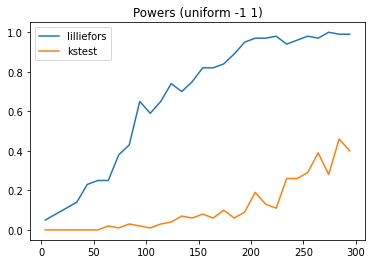

In [19]:

plt.plot(SAMPLE_SIZES, lpowers, label="lilliefors")
plt.plot(SAMPLE_SIZES, kpowers, label="kstest")
plt.title('Powers (uniform -1 1)')
plt.legend()
plt.show()

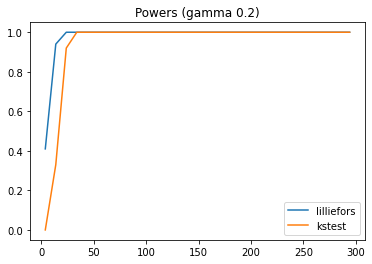

In [20]:

plt.plot(SAMPLE_SIZES, lpowers2, label="lilliefors")
plt.plot(SAMPLE_SIZES, kpowers2, label="kstest")
plt.title('Powers (gamma 0.2)')
plt.legend()
plt.show()

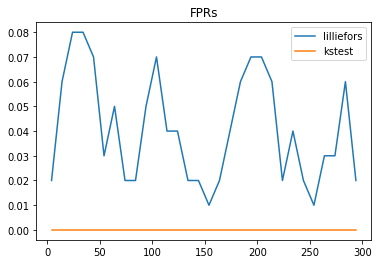

In [21]:

plt.plot(SAMPLE_SIZES, lfprs, label="lilliefors")
plt.plot(SAMPLE_SIZES, kfprs, label="kstest")
plt.title('FPRs')
plt.legend()
plt.show()

# Вывод
Хоть у kstest и меньше вероятность ошибки первого рода, но меньше и мощность, чем у lilliefors. Поэтому использовать следует lilliefors даже на выборках 100-200